<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Licence" data-toc-modified-id="Licence-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Licence</a></span></li><li><span><a href="#Purpose" data-toc-modified-id="Purpose-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Purpose</a></span></li><li><span><a href="#Input" data-toc-modified-id="Input-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Input</a></span></li><li><span><a href="#Output" data-toc-modified-id="Output-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Output</a></span></li></ul></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Parameters" data-toc-modified-id="Parameters-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Parameters</a></span></li><li><span><a href="#Functions-and-Classes" data-toc-modified-id="Functions-and-Classes-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Functions and Classes</a></span></li><li><span><a href="#System-dependent-Configuration" data-toc-modified-id="System-dependent-Configuration-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>System-dependent Configuration</a></span></li></ul></li><li><span><a href="#Collect-Data" data-toc-modified-id="Collect-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Collect Data</a></span><ul class="toc-item"><li><span><a href="#Collect-Reddit-Submissions-and-Comments" data-toc-modified-id="Collect-Reddit-Submissions-and-Comments-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Collect Reddit Submissions and Comments</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Introduction

Licence
-------------
Developed by the Discovery Lab, Applied Intelligence Group, Accenture Federal Systems.

```
Copyright (c) 2020 Accenture Federal Systems.

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
```


Purpose
-------------
This notebook collects posts and comments, and associated metadata from the [Reddit](https://www.reddit.com/) social media platform. It uses Reddit API through [PRAW](https://praw.readthedocs.io/en/latest/) and requires credentials.


Input
-------------
**Required Parameters**

- _**client\_id**_ (string) - A unique client id provided by Reddit.

- _**client\_secret**_ (string) - Secret associated with client id provided by Reddit.

- _**user\_agent**_ (string) - A unique user agent provided by Reddit.

- _**search\_terms**_ (array of strings) - Search terms.

- _**subreddits**_ (array of strings) - Names of subreddits to search from.


**Optional Parameters**

- _**post\_limit**_ (integer, default: 100, maximum: 1000) - Maximum number of posts to download.


Output
-------------
The outputs are two `CSV` files named `REDDIT_POSTS_{{DATETIME}}.csv` and `REDDIT_COMMENTS_{{DATETIME}}.csv`, where `{{DATETIME}}` is the approximate date/time of the data collection. These `CSV` files are saved in the `{{HOME}}/data/raw/Reddit` folder, where `{{HOME}}` is the project installation folder.

The columns of the output file `REDDIT_POSTS_{{DATETIME}}.csv` is as follows.

- _**author**_ (string) -  Provides an instance of `Redditor`.

- _**clicked**_ (binary) -  Whether or not the submission has been clicked by the client. 

- _**comments**_ (array of strings) -  Provides an instance of `CommentForest`. 

- _**created_utc**_ (datetime) - Time the submission was created, represented in Unix Time. 

- _**distinguished**_ (binary) - Whether or not the submission is distinguished. 

- _**edited**_ (binary) - Whether or not the submission has been edited. 

- _**id**_ (string) - ID of the submission. 

- _**is\_original_content**_ (binary) - Whether or not the submission has been set as original content. 

- _**is\_self**_ (binary) - Whether or not the submission is a selfpost (text-only). 

- _**link\_flair_template\_id**_ (string) - The link flair’s ID, or None if not flaired. 

- _**link\_flair\_text**_ (text) - The link flair’s text content, or None if not flaired. 

- _**locked**_ (binary) - Whether or not the submission has been locked. 

- _**name**_ (string) - Fullname of the submission. 

- _**num\_comments**_ (integer) - The number of comments on the submission. 

- _**over\_18**_ (binary) - Whether or not the submission has been marked as NSFW. 

- _**permalink**_ (string) - A permalink for the submission. 

- _**poll\_data**_ (object) - A PollData object representing the data of this submission, if it is a poll submission. 

- _**score**_ (integer) - The number of upvotes for the submission. 

- _**selftext**_ (text) - The submissions’ selftext - an empty string if a link post. 

- _**spoiler**_ (binary) - Whether or not the submission has been marked as a spoiler. 

- _**stickied**_ (binary) - Whether or not the submission is stickied. 

- _**subreddit**_ (string) - Provides an instance of Subreddit. 

- _**title**_ (text) - The title of the submission. 

- _**upvote\_ratio**_ (double) - The percentage of upvotes from all votes on the submission. 

- _**url**_ (string) - The URL the submission links to, or the permalink if a selfpost. 


The columns of the output file `REDDIT_COMMENTS_{{DATETIME}}.csv` is as follows.

- _**author**_ (string) - Provides an instance of Redditor. 

- _**body**_ (text) -  The body of the comment, as Markdown.

- _**body\_html**_ (text) - The body of the comment, as HTML.

- _**created\_utc**_ (datetime) - Time the comment was created, represented in Unix Time. 

- _**distinguished**_ (binary) - Whether or not the comment is distinguished. 

- _**edited**_ (binary) - Whether or not the comment has been edited. 

- _**id**_ (string) - ID of the comment. 

- _**is\_submitter**_ (binary) - Whether or not the comment author is also the author of the submission. 

- _**link\_id**_ (string) - The submission ID that the comment belongs to. 

- _**parent\_id**_ (string) - The ID of the parent comment (prefixed with t1\_). If it is a top-level comment, this returns the submission ID instead (prefixed with t3\_). 

- _**permalink**_ (string) - A permalink for the comment. Comment objects from the inbox have a context attribute instead. 

- _**replies**_ (integer) - Provides an instance of CommentForest. 

- _**score**_ (integer) - The number of upvotes for the comment. 

- _**stickied**_ (binary) - Whether or not the comment is stickied. 
 
- _**submission**_ (string) - Provides an instance of the submission that the comment belongs to. 

- _**subreddit**_ (string) - Provides an instance of the subreddit that the comment belongs to. 

- _**subreddit\_id**_ (string) - The subreddit ID that the comment belongs to. 


# Setup

<p> The imports, function and class defintions, global variables, and system-dependent configuration are in this section. </p>

<p> The system dependent configuration should be carefully reviewed and configured for each system (e.g., Linux vs. Windows, or the path of an external program) since the playbook will most likely fail without proper configuration. </p>

## Imports

In [113]:
!pip install pandas
!pip install matplotlib
!pip install plotly
!pip install selenium
!pip install bs4
!pip install praw
!pip install textblob
!pip install nltk
!pip install networkx
!pip install scipy

   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   -------- ------------------------------- 10.0/44.5 MB 51.9 MB/s eta 0:00:01
   --------------------- ------------------ 23.6/44.5 MB 59.8 MB/s eta 0:00:01
   ---------------------------------- ----- 38.0/44.5 MB 63.7 MB/s eta 0:00:01
   ---------------------------------------  44.3/44.5 MB 57.6 MB/s eta 0:00:01
   ---------------------------------------- 44.5/44.5 MB 53.5 MB/s eta 0:00:00


In [1]:
"""This cell imports necessary Python modules and performs initial configuration
"""

# Data manipulation libraries
import json
import pandas as pd 
import csv


# Visualization and Interaction
# import matplotlib.pyplot as plt
# plt.style.use('ggplot')
from IPython.display import set_matplotlib_formats, display, clear_output, HTML
set_matplotlib_formats('retina')
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected=True)
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import VBox, HBox, Button, HTML, Label


# Computation libraries 
import numpy as np
import re
import random


# Graph analysis
# import networkx as nx
# import community


# System related
# import sys
# import warnings;
# warnings.filterwarnings('ignore')
import io
import platform
from pathlib import Path
import os
from getpass import getpass
# from joblib import Parallel, delayed


# Datetime libraries
from datetime import datetime
import time
from pytz import timezone


# NLP dependencies
# import spacy
# from spacy.tokenizer import Tokenizer
# nlp = spacy.load('en')
# tokenizer = Tokenizer(nlp.vocab)
# from langdetect import detect


# Scraping libraries
from selenium import webdriver
from selenium.common.exceptions import StaleElementReferenceException
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from bs4 import BeautifulSoup


# Machine learning libraries
# from sklearn import datasets
# from sklearn import linear_model
# from sklearn.feature_selection import f_regression, mutual_info_regression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report


# Logging
import logging 
logging.basicConfig(level=logging.INFO)


# For Reddit
import praw
from praw.models import MoreComments

C:\Users\dunca\AppData\Local\Temp\ipykernel_9788\4234844595.py:14: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


## Parameters

In [2]:
"""This cell defines global variables and parameters used throughout the playbook
"""

# Set this to True if you want to watch Selenium scrape pages
# WATCH_SCRAPING = True

# Set this to True if you want to use incognito mode
# USE_INCOGNITO = True

# Number of posts 
post_limit = 100

# The data is written 
RAW_DATA_DIRECTORY = Path("./data/")

# Setup logging level
LOGGING_LEVEL = logging.INFO 
logging.basicConfig(level=LOGGING_LEVEL)

## Functions and Classes

In [4]:
"""This cell defines functions and classes used throughout the playbook
"""

def __init__(self, client_id, client_secret, user_agent, password):
    self.client_id = client_id
    self.client_secret = client_secret
    self.user_agent = user_agent
    self.password = password


def token(client_id, client_secret, user_agent):
    reddit = praw.Reddit(client_id=client_id,
                         client_secret=client_secret,
                         user_agent=user_agent)
    if (reddit != False):
        print("Successful token")
    else:
        print("Failed token")
    return reddit


def search_reddit(reddit, search_term, sort_type, time_limit, post_limit):
    """
    GRAB REDDIT POSTS BY SEARCH TERM
    search_term = any boolean search #https://www.reddit.com/dev/api/
    sort_type = 'relevance', 'hot', 'top', 'new', 'comments'
    time_limit = 'all', 'hour', 'day', 'week', 'month', 'year'
    post_limit = 1000 maximum
    """

    posts = []
    subreddit = reddit.subreddit("all")
    for post in subreddit.search(search_term, sort=sort_type, time_filter=time_limit, limit=post_limit):
        posts.append([post.subreddit, post.id, post.title, post.selftext, post.author, post.url, post.permalink,
                      post.num_comments, post.created, post.score, post.distinguished, post.is_original_content,
                      post.upvote_ratio, post.link_flair_text])
    posts = pd.DataFrame(posts,
                         columns=['subreddit', 'post_id', 'title', 'post_body', 'post_author', 'url', 'post_permalink',
                                  'num_comments', 'post_created', 'post_score', 'post_distinguished',
                                  'original_content', 'upvote_ratio', 'flair_text'])
    posts['post_created'] = pd.to_datetime(posts['post_created'], unit='s')
    posts['scrape_time'] = datetime.now()
    posts[['subreddit', 'post_id', 'title', 'post_author',
           'post_body', 'url', 'post_permalink', 'flair_text']] = posts[['subreddit', 'post_id', 'title', 'post_author',
                                                                         'post_body', 'url', 'post_permalink',
                                                                         'flair_text']].astype(str)
    return posts


def get_subreddit(reddit, sub, sort_type, time_limit, post_limit):
    '''
    GRAB REDDIT POSTS BY SUBREDDIT
    sub = subreddits
    sort_type = 'hot', 'top', 'new', 'gilded', 'rising', 'controversial'
    time_limit = 'all', 'hour', 'day', 'week', 'month', 'year'
    post_limit = 1000 maximum
    '''
    subreddit = reddit.subreddit(sub)
    posts = []
    if (sort_type == "top") or (sort_type == "hot") or (sort_type == "controversial"):
        for post in subreddit.top(time_filter=time_limit, limit=post_limit):
            posts.append([post.subreddit, post.id, post.title, post.selftext, post.author, post.url, post.permalink,
                          post.num_comments, post.created, post.score, post.distinguished, post.is_original_content,
                          post.upvote_ratio, post.link_flair_text])

    if (sort_type == "new") or (sort_type == "rising"):
        for post in subreddit.new(limit=post_limit):
            posts.append([post.subreddit, post.id, post.title, post.selftext, post.author, post.url, post.permalink,
                          post.num_comments, post.created, post.score, post.distinguished, post.is_original_content,
                          post.upvote_ratio, post.link_flair_text])

    posts = pd.DataFrame(posts,
                         columns=['subreddit', 'post_id', 'title', 'post_body', 'post_author', 'url', 'post_permalink',
                                  'num_comments', 'post_created', 'post_score', 'post_distinguished',
                                  'original_content', 'upvote_ratio', 'flair_text'])
    posts['post_created'] = pd.to_datetime(posts['post_created'], unit='s')
    posts['scrape_time'] = datetime.now()
    posts[['subreddit', 'post_id', 'title', 'post_author',
           'post_body', 'url', 'post_permalink', 'flair_text', ]] = posts[
        ['subreddit', 'post_id', 'title', 'post_author',
         'post_body', 'url', 'post_permalink', 'flair_text']].astype(str)
    return posts


def get_reddit_comments(reddit, post_id):
    submission = reddit.submission(id=post_id)
    comment = []
    for top_level in submission.comments:
        if isinstance(top_level, MoreComments):
            continue
        comment.append([top_level.subreddit, top_level.submission, top_level.id, top_level.parent_id, top_level.author,
                        top_level.permalink, top_level.body, top_level.created, top_level.score,
                        top_level.distinguished])
    comments = pd.DataFrame(comment, columns=['subreddit', 'post_id', 'comment_id', 'parent_id', 'comment_author',
                                              'comment_permalink', 'comment_body', 'comment_created', 'comment_score',
                                              'comment_distinguished'])
    comments['comment_created'] = pd.to_datetime(comments['comment_created'], unit='s')
    comments['scrape_time'] = datetime.now()
    comments[['subreddit', 'post_id', 'comment_id', 'parent_id',
              'comment_author', 'comment_permalink', 'comment_body']] = comments[
        ['subreddit', 'post_id', 'comment_id', 'parent_id',
         'comment_author', 'comment_permalink', 'comment_body']].astype(str)
    return comments

## System-dependent Configuration

In [5]:
"""This cell defines system-dependent configuration such as those different in Linux vs. Windows
"""

# Get the system information from the OS
PLATFORM_SYSTEM = platform.system()

# Darwin is macOS
if PLATFORM_SYSTEM == "Darwin":
    EXECUTABLE_PATH = Path("../dependencies/chromedriver")
elif PLATFORM_SYSTEM == "Windows":
    EXECUTABLE_PATH = Path("../dependencies/chromedriver.exe")
else:
    logging.critical("Chromedriver not found or Chromedriver is outdated...")
    exit()
    
tz = timezone('US/Eastern')    

# Collect Data

## Collect Reddit Submissions and Comments

In [76]:
"""This cell retrieves page posts and comments, for a given page.
"""

def main():
    # Credentials (create client_id, client_secret, user_agent by following https://praw.readthedocs.io/en/latest/getting_started/quick_start.html)
    client_id = getpass("Enter client_id: ")
    client_secret = getpass("Enter client secret: ")
    user_agent = input("Enter user agent: ")

    ''' Designate input parameters for functions
    search terms = key terms to search ALL of reddit
    subreddits = subreddits to collect
    search_sort_type = 'relevance', 'hot', 'top', 'new', 'comments'
    sub_sort_type = 'hot', 'top', 'new', 'gilded', 'rising', 'controversial'
    time_limit = 'all', 'hour', 'day', 'week', 'month', 'year'
    post_limit = 10
    '''

    sub_sort_type = 'new'  # , 'top', 'new', 'gilded', 'rising', 'controversial'
    search_sort_type = 'new'  # , 'hot', 'top', 'new', 'comments', 'relevance'
    time_limit = 'year'  # , 'hour', 'day', 'week', 'month', 'year'
    
    # search_terms = ["covid19", "coronavirus"]
    # subreddits = ["CoronavirusMemes", "Coronavirus", "CoronavirusUS"]

    input_search_terms = input("Enter search terms (seperated by spaces): ")
    search_terms = input_search_terms.split()
    
    input_subreddits = input("Enter subreddits (separated by spaces): ")
    subreddits = input_subreddits.split()
    
    ''' Collect posts & corresponding comments
    '''
    # Create client
    r = token(client_id, client_secret, user_agent)
    list_posts_df = []
    try:
        for query in search_terms:
            post_df = search_reddit(r, query, search_sort_type, time_limit, post_limit)
            print("Grabbed", len(post_df), "posts with search term:", query)
            list_posts_df.append(post_df)
    except:
        pass

    try:
        for sub in subreddits:
            post_df = get_subreddit(r, sub, sub_sort_type, time_limit, post_limit)
            print("Grabbed", len(post_df), "posts from subreddit:", sub)
            list_posts_df.append(post_df)
    except:
        pass

    new_posts = pd.concat(list_posts_df)
    print("Number of posts: ", new_posts.shape[0])

    # File output for posts
    filename_csv = "REDDIT_POSTS_BYNEW" + datetime.now(tz=tz).strftime("%Y-%m-%dT%H-%M-%S%z") + ".csv"
    new_posts.to_csv(str(RAW_DATA_DIRECTORY / filename_csv), index=False)
    print("Exported posts to CSV")


    # Computer was struggling to get these due to amount of posts I was getting, felt I wanted mostly posts anyways so I commented this out

    # # Get comments
    # post_ids = new_posts['post_id'].to_list()
    # list_comment_dfs = []
    # i = 0
    # for post in post_ids:
    #     try:
    #         comment_df = get_reddit_comments(r, post)
    #         list_comment_dfs.append(comment_df)
    #         # print(i, "Grabbed", len(comment_df), "comments from post id:", post)
    #     except:
    #         pass
    #     i += 1
    # post_comments = pd.concat(list_comment_dfs)
    # print("Number of total comments: ", post_comments.shape[0])

    # # File output for comment
    # com_filename_csv = "REDDIT_COMMENTS_BYTOP" + datetime.now(tz=tz).strftime("%Y-%m-%dT%H-%M-%S%z") + ".csv"
    # post_comments.to_csv(str(RAW_DATA_DIRECTORY / com_filename_csv), index=False)
    # print("Exported comments to CSV")


if __name__ == "__main__":
    main()
    
    client_id = 'Mo7nM-yhqz1cww'
client_secret = '-4O8dN-Emr5PdkQfy8ifCSVlihE'
user_agent = 'collectPosts'

Successful token
Grabbed 100 posts with search term: debate
Grabbed 100 posts with search term: election
Grabbed 100 posts with search term: candidate
Grabbed 100 posts with search term: Trump
Grabbed 100 posts with search term: Harris
Grabbed 100 posts with search term: Donald
Grabbed 100 posts with search term: Kamala
Grabbed 100 posts with search term: president
Grabbed 100 posts with search term: vote
Grabbed 100 posts from subreddit: politics
Grabbed 100 posts from subreddit: inthenews
Grabbed 100 posts from subreddit: AnythingGoesNews
Grabbed 100 posts from subreddit: sanepolitics
Grabbed 100 posts from subreddit: imaginaryelections
Grabbed 100 posts from subreddit: USNewsHub
Grabbed 100 posts from subreddit: NewsOfTheStupid
Grabbed 100 posts from subreddit: Law_and_Politics
Grabbed 100 posts from subreddit: worldnews
Grabbed 100 posts from subreddit: azpolitics
Grabbed 100 posts from subreddit: moderatepolitics
Grabbed 100 posts from subreddit: WomenInNews
Grabbed 100 posts from

# Conclusion

In [1]:
"""Add post-processing steps here
"""
import pandas as pd

# Load the CSV files into DataFrames
df1 = pd.read_csv('./data/REDDIT_POSTS_BYHOT2024-09-14T12-18-21-0400.csv')
df2 = pd.read_csv('./data/REDDIT_POSTS_BYNEW2024-09-14T12-19-45-0400.csv')
df3 = pd.read_csv('./data/REDDIT_POSTS_BYTOP2024-09-14T12-17-06-0400.csv')

# Combine the DataFrames
df_combined = pd.concat([df1, df2, df3], ignore_index=True).drop_duplicates()

In [2]:
#Drop columns that I don't think are important
df_combined.info(verbose=True)
df_combined = df_combined.drop(columns=["scrape_time", "post_id", "url", "post_permalink", "post_distinguished", "flair_text"], axis=1)
df_combined.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12107 entries, 0 to 12106
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   subreddit           12107 non-null  object 
 1   post_id             12107 non-null  object 
 2   title               12107 non-null  object 
 3   post_body           1698 non-null   object 
 4   post_author         11726 non-null  object 
 5   url                 12107 non-null  object 
 6   post_permalink      12107 non-null  object 
 7   num_comments        12107 non-null  int64  
 8   post_created        12107 non-null  object 
 9   post_score          12107 non-null  int64  
 10  post_distinguished  27 non-null     object 
 11  original_content    12107 non-null  bool   
 12  upvote_ratio        12107 non-null  float64
 13  flair_text          4034 non-null   object 
 14  scrape_time         12107 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(11)
memory u

In [3]:
#Look at data
df_combined.head()

,subreddit,title,post_body,post_author,num_comments,post_created,post_score,original_content,upvote_ratio
0,politics,"Trump Is Losing The Post-Debate Debate, Too",NaN,IntelligentYinzer,123,2024-09-13 14:00:51,2795,False,0.98
1,Jordan_Peterson_Memes,Debate Again??,NaN,novafreak69,991,2024-09-14 03:41:18,1198,False,0.73
2,pinoybigbrother,DEBATE,"finally out, okay so sino ngayon ang below the...",hellabellaloo,133,2024-09-14 12:45:35,61,False,0.89
3,DylanBurnsTV,DEBATE NIGHT: Debating Trump v Harris Debate (...,\n[I predict Dylan's hair will win this one as...,DreadfulDave19,0,2024-09-14 02:47:36,3,False,1.00
4,nbacirclejerk,Debate over.,NaN,randus12,15,2024-09-13 17:57:42,3169,False,0.99


In [4]:
# Replace the NaN with '' so we can do analysis
df_combined["post_body"] = df_combined["post_body"].fillna('')

In [5]:
#Sentiment Scores!
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(text):
    if isinstance(text, str):
        sentiment = sia.polarity_scores(text)
        return sentiment['compound']  # Return the compound score
    return 0  # Return neutral sentiment if text is not a string

# apply sentiment analysis to combined dataframe
df_combined['sentiment'] = df_combined['post_body'].apply(get_sentiment)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dunca\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
# Make 3 DFs one for Kamala one for Trump and one for both, this of course may have discussions of one candidate within the others df but hopefully since I did it the same way for both that wont matter too much
candidates = {
    'Candidate1': 'Kamala Harris',
    'Candidate2': 'Donald Trump'
}

dfs = {}

# Filter DataFrames for each candidate
for key, name in candidates.items():
    mask = df_combined['post_body'].str.contains(name, case=False, na=False) | \
           df_combined['title'].str.contains(name, case=False, na=False)
    dfs[key] = df_combined[mask]

# Combine DataFrames for overall sentiment
df_overall = pd.concat([dfs['Candidate1'], dfs['Candidate2']], ignore_index=True).drop_duplicates()

In [7]:
dfs['Candidate1'].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 456 entries, 80 to 11536
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subreddit         456 non-null    object 
 1   title             456 non-null    object 
 2   post_body         456 non-null    object 
 3   post_author       456 non-null    object 
 4   num_comments      456 non-null    int64  
 5   post_created      456 non-null    object 
 6   post_score        456 non-null    int64  
 7   original_content  456 non-null    bool   
 8   upvote_ratio      456 non-null    float64
 9   sentiment         456 non-null    float64
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 36.1+ KB


In [8]:
dfs['Candidate2'].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 636 entries, 135 to 12063
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subreddit         636 non-null    object 
 1   title             636 non-null    object 
 2   post_body         636 non-null    object 
 3   post_author       624 non-null    object 
 4   num_comments      636 non-null    int64  
 5   post_created      636 non-null    object 
 6   post_score        636 non-null    int64  
 7   original_content  636 non-null    bool   
 8   upvote_ratio      636 non-null    float64
 9   sentiment         636 non-null    float64
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 50.3+ KB


In [9]:
df_overall.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 905 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subreddit         905 non-null    object 
 1   title             905 non-null    object 
 2   post_body         905 non-null    object 
 3   post_author       893 non-null    object 
 4   num_comments      905 non-null    int64  
 5   post_created      905 non-null    object 
 6   post_score        905 non-null    int64  
 7   original_content  905 non-null    bool   
 8   upvote_ratio      905 non-null    float64
 9   sentiment         905 non-null    float64
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 71.6+ KB


In [10]:
# Calculate average sentiment score for each candidate
for key, df in dfs.items():
    avg_sentiment = df['sentiment'].mean()
    print(f"Average sentiment for {key}: {avg_sentiment}")

# Calculate average sentiment score for overall posts
avg_sentiment_overall = df_overall['sentiment'].mean()
print(f"Average sentiment overall: {avg_sentiment_overall}")

Average sentiment for Candidate1: 0.07786754385964911
Average sentiment for Candidate2: 0.005078301886792452
Average sentiment overall: 0.021762762430939227


In [11]:
# Get the row with the highest sentiment score
highest_sentiment_post = dfs['Candidate1'].loc[dfs['Candidate1']['sentiment'].idxmax()]

# Get the row with the lowest sentiment score
lowest_sentiment_post = dfs['Candidate1'].loc[dfs['Candidate1']['sentiment'].idxmin()]

print("Post with the highest sentiment score:")
print(highest_sentiment_post)
print("\nPost with the lowest sentiment score:")
print(lowest_sentiment_post)

Post with the highest sentiment score:
subreddit                                        PresidentialElection
title                  What to Take Away from the Harris-Trump Debate
post_body           Here's a breakdown of how each candidate perfo...
post_author                                             TheGFromTheNE
num_comments                                                        3
post_created                                      2024-09-12 21:54:20
post_score                                                          6
original_content                                                False
upvote_ratio                                                      0.8
sentiment                                                      0.9993
Name: 6318, dtype: object

Post with the lowest sentiment score:
subreddit                                        PresidentialElection
title                     Detailed Summary of the Harris-Trump Debate
post_body           The opening of the debate sets a his

In [12]:
# Get the row with the highest sentiment score
highest_sentiment_post = dfs['Candidate2'].loc[dfs['Candidate2']['sentiment'].idxmax()]

# Get the row with the lowest sentiment score
lowest_sentiment_post = dfs['Candidate2'].loc[dfs['Candidate2']['sentiment'].idxmin()]

print("Post with the highest sentiment score:")
print(highest_sentiment_post)
print("\nPost with the lowest sentiment score:")
print(lowest_sentiment_post)

Post with the highest sentiment score:
subreddit                                                    politics
title               Megathread: US Supreme Court Finds in Trump v....
post_body           On Monday, the US Supreme Court sent the case ...
post_author                                      PoliticsModeratorBot
num_comments                                                    22137
post_created                                      2024-07-01 14:44:10
post_score                                                      35358
original_content                                                False
upvote_ratio                                                     0.93
sentiment                                                      0.9994
Name: 8284, dtype: object

Post with the lowest sentiment score:
subreddit                                                    politics
title               Megathread: Former US President Donald Trump C...
post_body           Today, on its second day of delibera

In [13]:
# Get the row with the highest sentiment score
highest_sentiment_post = df_overall.loc[df_overall['sentiment'].idxmax()]

# Get the row with the lowest sentiment score
lowest_sentiment_post = df_overall.loc[df_overall['sentiment'].idxmin()]

print("Post with the highest sentiment score:")
print(highest_sentiment_post)
print("\nPost with the lowest sentiment score:")
print(lowest_sentiment_post)

Post with the highest sentiment score:
subreddit                                                    politics
title               Megathread: US Supreme Court Finds in Trump v....
post_body           On Monday, the US Supreme Court sent the case ...
post_author                                      PoliticsModeratorBot
num_comments                                                    22137
post_created                                      2024-07-01 14:44:10
post_score                                                      35358
original_content                                                False
upvote_ratio                                                     0.93
sentiment                                                      0.9994
Name: 846, dtype: object

Post with the lowest sentiment score:
subreddit                                                    politics
title               Megathread: Former US President Donald Trump C...
post_body           Today, on its second day of deliberat

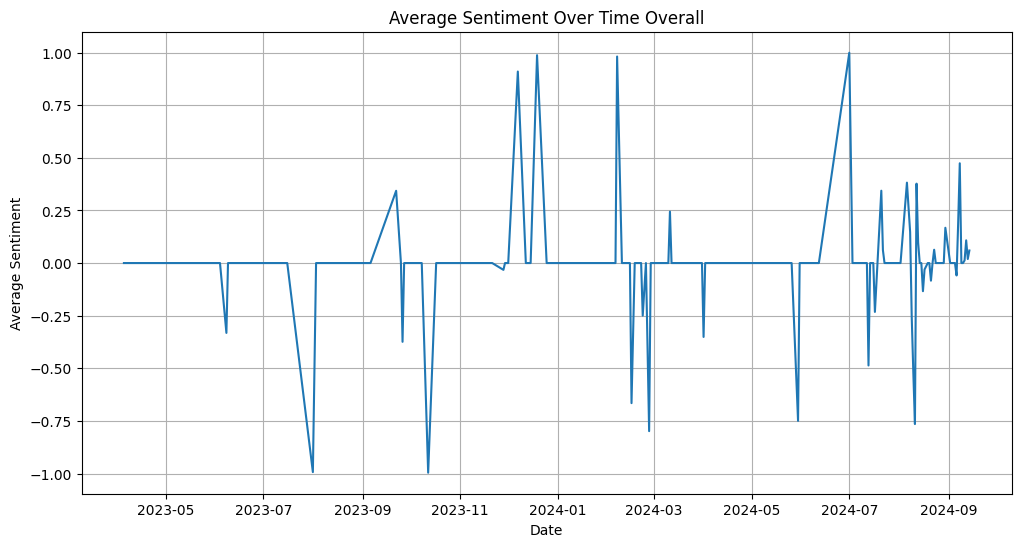

In [17]:
import matplotlib.pyplot as plt

# Convert post_created to datetime
df_overall['post_created'] = pd.to_datetime(df_overall['post_created'])

# Aggregate sentiment by day
daily_sentiment = df_overall.groupby(df_overall['post_created'].dt.date)['sentiment'].mean()

plt.figure(figsize=(12, 6))
daily_sentiment.plot()
plt.title('Average Sentiment Over Time Overall')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.grid(True)
plt.show()

C:\Users\dunca\AppData\Local\Temp\ipykernel_88132\3232417552.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['Candidate1']['post_created'] = pd.to_datetime(dfs['Candidate1']['post_created'])


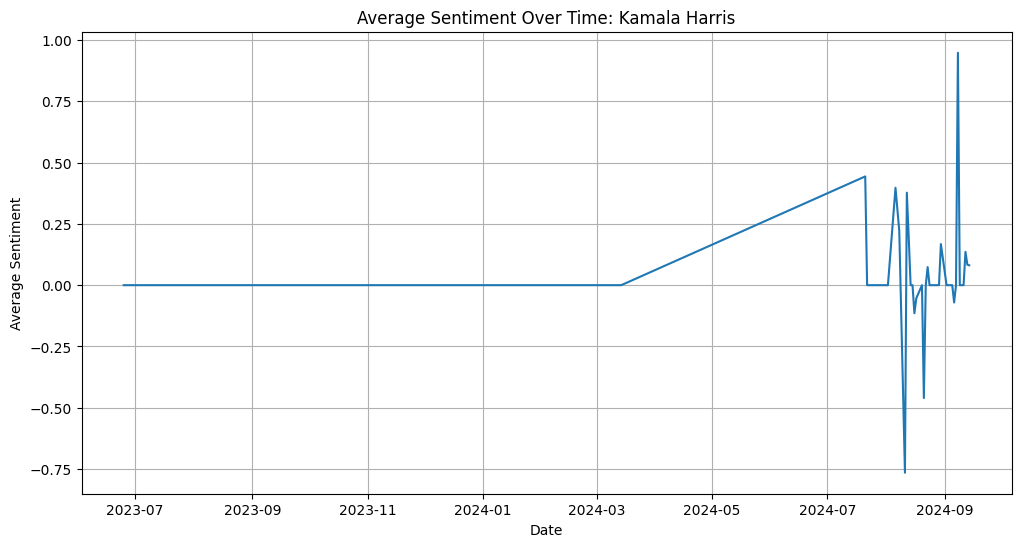

In [18]:
import matplotlib.pyplot as plt

# Convert post_created to datetime
dfs['Candidate1']['post_created'] = pd.to_datetime(dfs['Candidate1']['post_created'])

# Aggregate sentiment by day
daily_sentiment = dfs['Candidate1'].groupby(dfs['Candidate1']['post_created'].dt.date)['sentiment'].mean()

plt.figure(figsize=(12, 6))
daily_sentiment.plot()
plt.title('Average Sentiment Over Time: Kamala Harris')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.grid(True)
plt.show()

C:\Users\dunca\AppData\Local\Temp\ipykernel_88132\270463323.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['Candidate2']['post_created'] = pd.to_datetime(dfs['Candidate2']['post_created'])


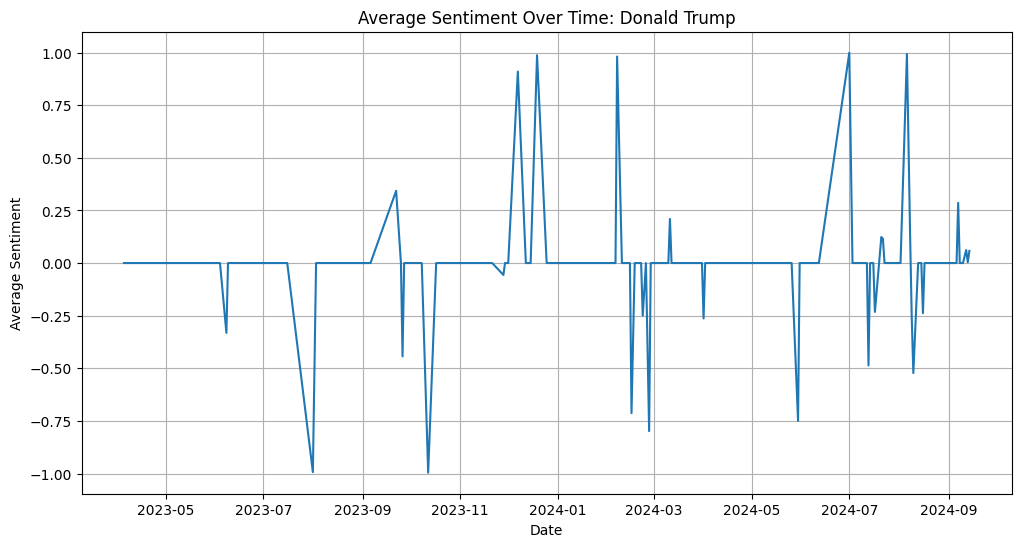

In [19]:
import matplotlib.pyplot as plt

# Convert post_created to datetime
dfs['Candidate2']['post_created'] = pd.to_datetime(dfs['Candidate2']['post_created'])

# Aggregate sentiment by day
daily_sentiment = dfs['Candidate2'].groupby(dfs['Candidate2']['post_created'].dt.date)['sentiment'].mean()

plt.figure(figsize=(12, 6))
daily_sentiment.plot()
plt.title('Average Sentiment Over Time: Donald Trump')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.grid(True)
plt.show()

In [20]:
import pandas as pd

# Convert 'post_created' column to datetime
df_combined['post_created'] = pd.to_datetime(df_combined['post_created'])

specified_date = pd.Timestamp('2024-09-10')  # Candidate Debate

# Filter the dataframe for posts before and after the specified date
df_before = df_combined[df_combined['post_created'] < specified_date]
df_after = df_combined[df_combined['post_created'] >= specified_date]

# Calculate average sentiment before and after the specified date
average_sentiment_before = df_before['sentiment'].mean()
average_sentiment_after = df_after['sentiment'].mean()

print(f"Average sentiment before {specified_date}: {average_sentiment_before}")
print(f"Average sentiment after {specified_date}: {average_sentiment_after}")

Average sentiment before 2024-09-10 00:00:00: 0.01266912016884316
Average sentiment after 2024-09-10 00:00:00: 0.045161953159522754


In [21]:
# Convert 'post_created' column to datetime
dfs['Candidate1']['post_created'] = pd.to_datetime(dfs['Candidate1']['post_created'])

specified_date = pd.Timestamp('2024-09-10')  # Candidate Debate

# Filter the dataframe for posts before and after the specified date
df_before = dfs['Candidate1'][dfs['Candidate1']['post_created'] < specified_date]
df_after = dfs['Candidate1'][dfs['Candidate1']['post_created'] >= specified_date]

# Calculate average sentiment before and after the specified date
average_sentiment_before = df_before['sentiment'].mean()
average_sentiment_after = df_after['sentiment'].mean()

print(f"Average sentiment before {specified_date}: {average_sentiment_before}")
print(f"Average sentiment after {specified_date}: {average_sentiment_after}")

Average sentiment before 2024-09-10 00:00:00: 0.09161202531645568
Average sentiment after 2024-09-10 00:00:00: 0.07058020134228188


C:\Users\dunca\AppData\Local\Temp\ipykernel_88132\1840461970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['Candidate1']['post_created'] = pd.to_datetime(dfs['Candidate1']['post_created'])


In [22]:
# Convert 'post_created' column to datetime
dfs['Candidate2']['post_created'] = pd.to_datetime(dfs['Candidate2']['post_created'])

specified_date = pd.Timestamp('2024-09-10')  # Candidate Debate

# Filter the dataframe for posts before and after the specified date
df_before = dfs['Candidate2'][dfs['Candidate2']['post_created'] < specified_date]
df_after = dfs['Candidate2'][dfs['Candidate2']['post_created'] >= specified_date]

# Calculate average sentiment before and after the specified date
average_sentiment_before = df_before['sentiment'].mean()
average_sentiment_after = df_after['sentiment'].mean()

print(f"Average sentiment before {specified_date}: {average_sentiment_before}")
print(f"Average sentiment after {specified_date}: {average_sentiment_after}")

Average sentiment before 2024-09-10 00:00:00: -0.017902051282051284
Average sentiment after 2024-09-10 00:00:00: 0.04151056910569106


C:\Users\dunca\AppData\Local\Temp\ipykernel_88132\1496660853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['Candidate2']['post_created'] = pd.to_datetime(dfs['Candidate2']['post_created'])
